# Alalysing data


In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

df = pd.read_csv("loan.csv", low_memory=False)
df.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


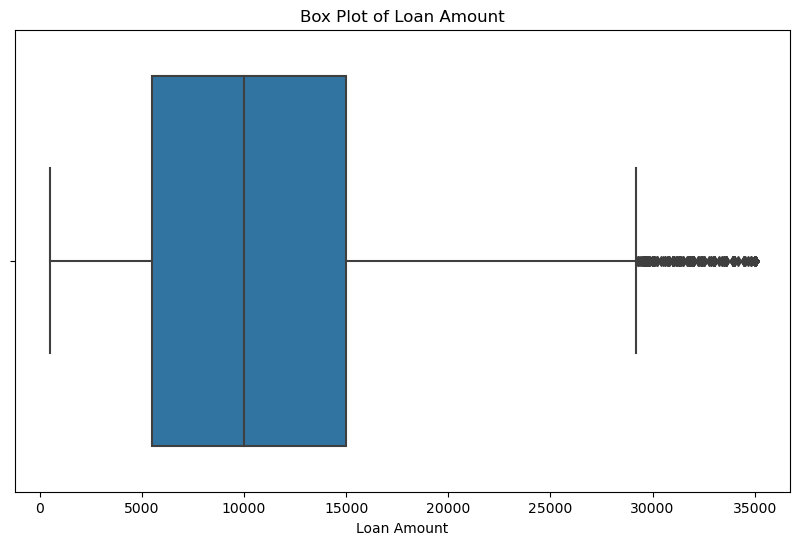

In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()


# Viewing impotant data

###  1. acc_now_delinq

<Axes: >

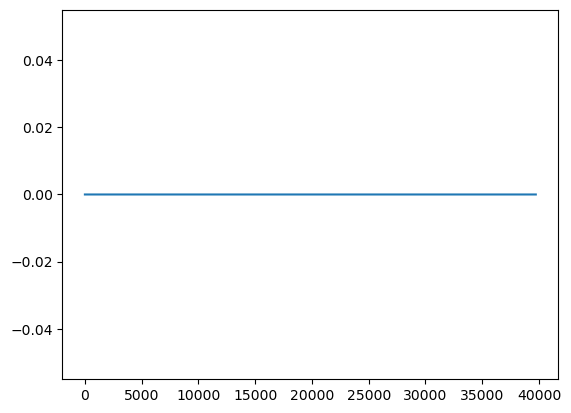

In [173]:
df['acc_now_delinq'].plot()

No of account delinquent is not only serious but also very rare, and loan must me rejected if even single account is delinquent.

### 2. Relation with loan_amnt 

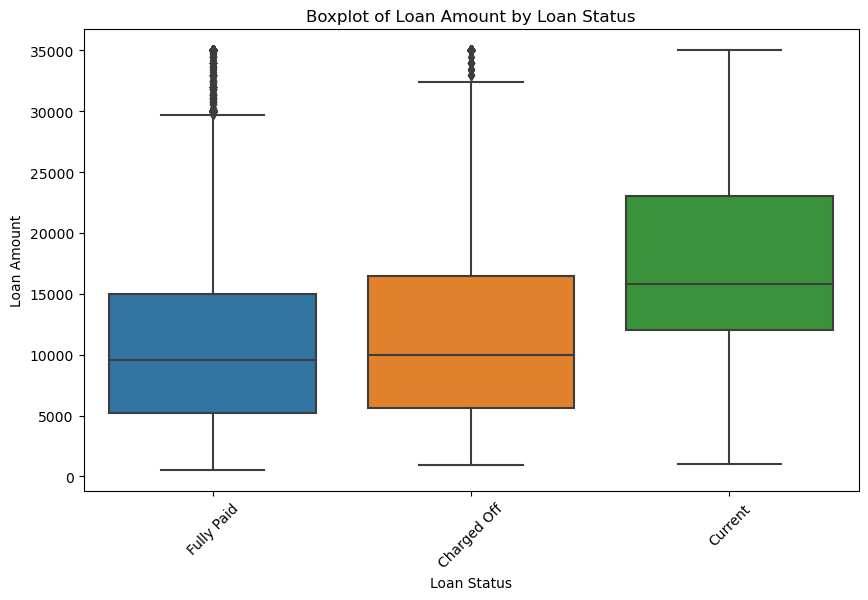

In [174]:
loan_amount_column = 'loan_amnt'
loan_status_column = 'loan_status'


plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_status_column, y=loan_amount_column, data=df)
plt.title('Boxplot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  
plt.show()

there is no relation ship

### Analysing loan amount, annual income relation with charged off status

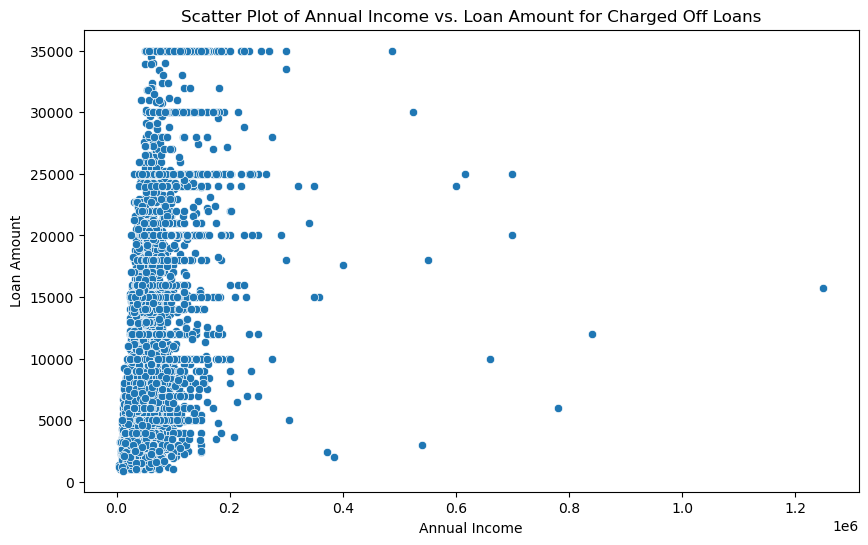

In [175]:
df_charged_off = df[df['loan_status'] == 'Charged Off']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df_charged_off)
plt.title('Scatter Plot of Annual Income vs. Loan Amount for Charged Off Loans')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

### In overall there is not much visual information


### 3. We will analyse   annual income/loan amount ration if it matters

<Figure size 1200x600 with 0 Axes>

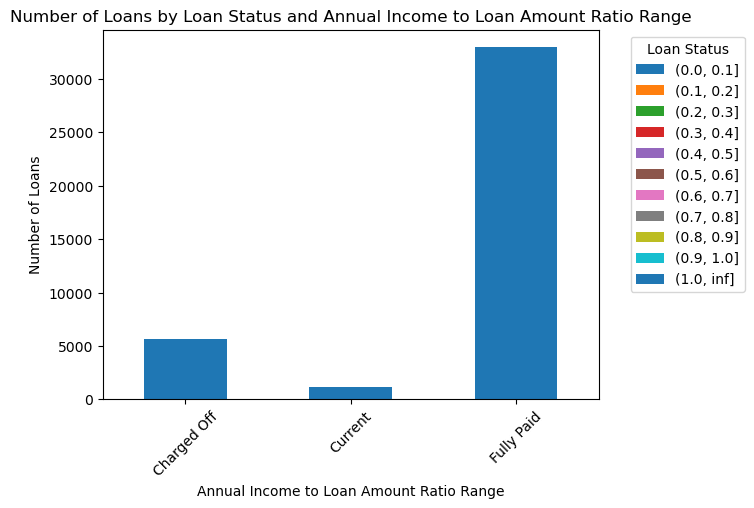

In [176]:
df['income_to_loan_ratio'] = df['annual_inc'] / df['loan_amnt']

# Define the bins for the ratio ranges
ratio_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, float('inf')]

# Create a new column to categorize the ratio into bins
df['ratio_bin'] = pd.cut(df['income_to_loan_ratio'], bins=ratio_bins, right=True)

# Count the number of loans for each loan status category in each ratio range
loan_status_counts = df.groupby(['loan_status', 'ratio_bin']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
loan_status_counts.plot(kind='bar', stacked=True)
plt.title('Number of Loans by Loan Status and Annual Income to Loan Amount Ratio Range')
plt.xlabel('Annual Income to Loan Amount Ratio Range')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### No, it does not affect

### 4. relation in verification status of income

<Figure size 1000x600 with 0 Axes>

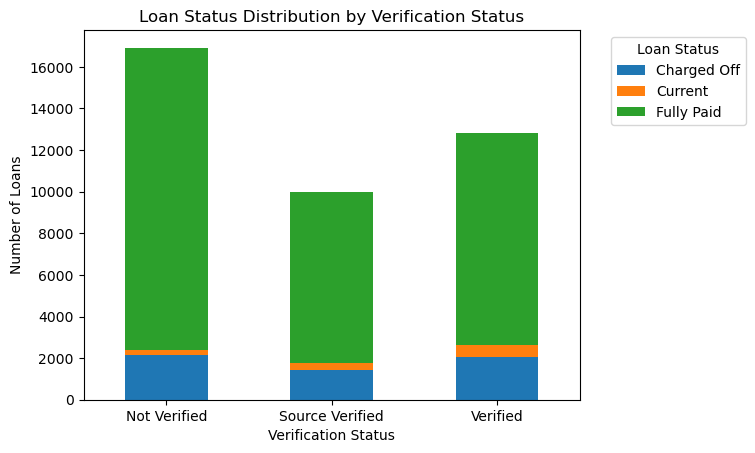

In [72]:
cross_tab = pd.crosstab(df['verification_status'], df['loan_status'])
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Loan Status Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Verified & not verified have equal amount of charged of do it does not matter

### 5. relation in verification status of income





<Axes: >

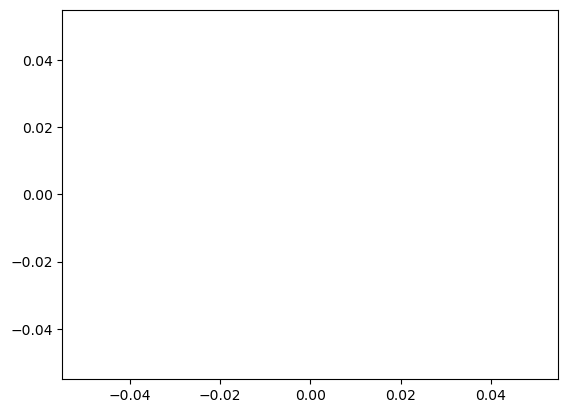

In [67]:
df['inq_last_12m'].plot()

In case even one found the loan application will be rejected


### 6. relation with home ownership





<Figure size 1000x600 with 0 Axes>

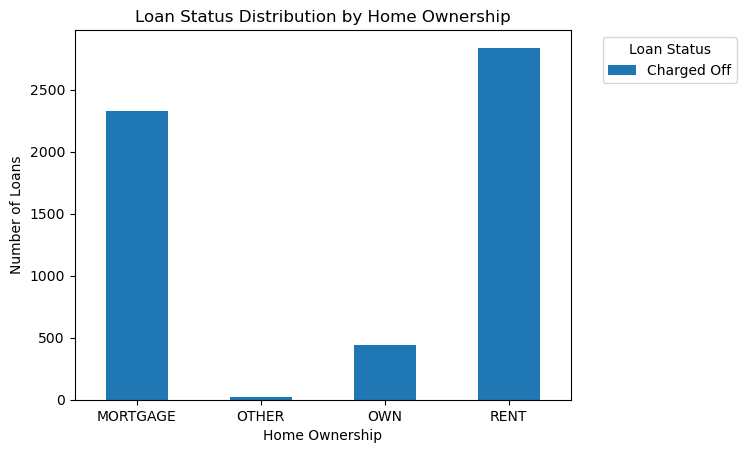

In [166]:


cross_tab = pd.crosstab(df_charged_off['home_ownership'], df_charged_off['loan_status'])

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

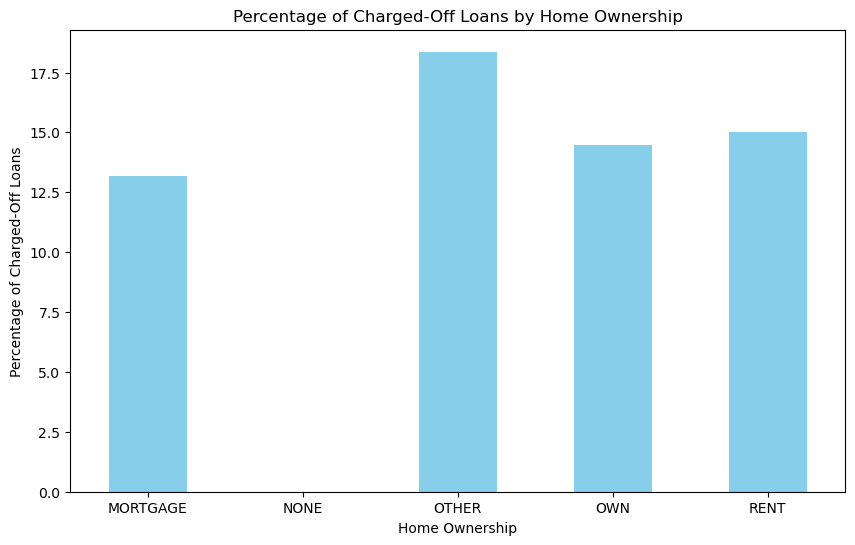

In [70]:
charged_off_percentages = df.groupby('home_ownership')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100)

plt.figure(figsize=(10, 6))
charged_off_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Charged-Off Loans by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage of Charged-Off Loans')
plt.xticks(rotation=0)
plt.show()

### Hence there is no significant relation

### 7. We will compare now the relation with employment length

In [78]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

<Figure size 2000x1000 with 0 Axes>

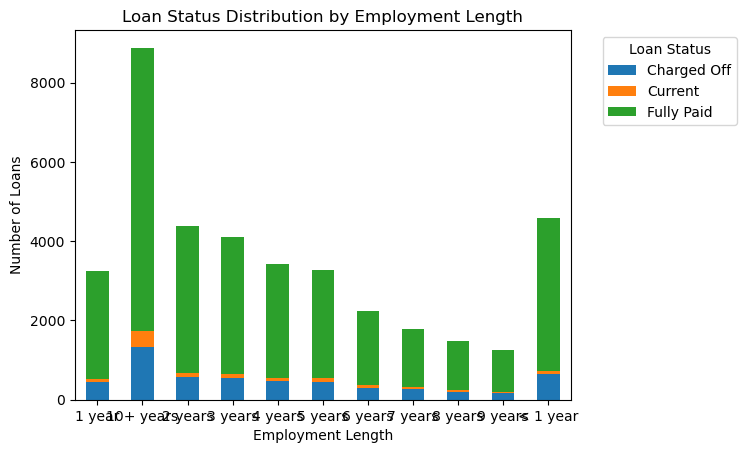

In [79]:
cross_tab = pd.crosstab(df['emp_length'], df['loan_status'])

plt.figure(figsize=(20, 10))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Loan Status Distribution by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)  
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### We can see that both paid & charged off are in same ranges, so this relation do not work

### 8.  Now we will compare with delinq_amnt

<Axes: >

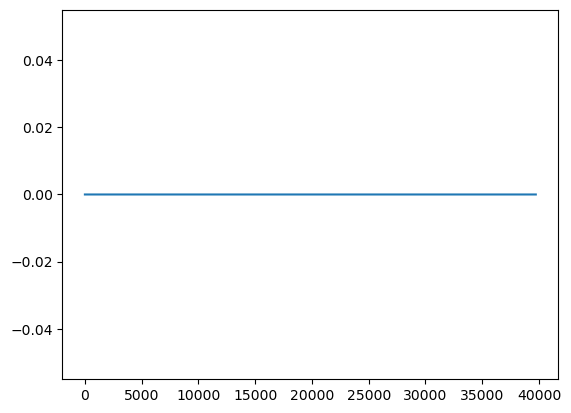

In [83]:
df['delinq_amnt'].plot()

In case if amount is greater than 1000 the loan application will be rejected


### 10.  Now we will compare with charged off in last 12 months

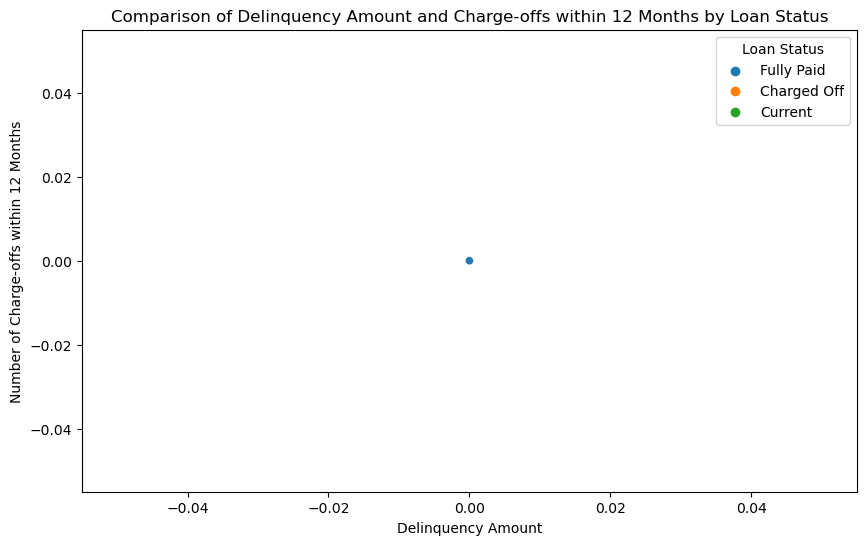

In [84]:
df_filtered = df[['delinq_amnt', 'chargeoff_within_12_mths', 'loan_status']]

# Create a scatter plot to compare delinq_amnt and chargeoff_within_12_mths by loan status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delinq_amnt', y='chargeoff_within_12_mths', hue='loan_status', data=df_filtered)
plt.title('Comparison of Delinquency Amount and Charge-offs within 12 Months by Loan Status')
plt.xlabel('Delinquency Amount')
plt.ylabel('Number of Charge-offs within 12 Months')
plt.legend(title='Loan Status')
plt.show()


If there is more than 1, the loan will be rejected

### 11.  Now we will compare with balace/limit on credit

In [87]:
df['bc_util'].unique()

array([nan])

### 12.  Now we will compare with avg balance

In [169]:
df['avg_cur_bal'].unique()

array([nan])

### 13.  Now we will compare with annual income

<Axes: >

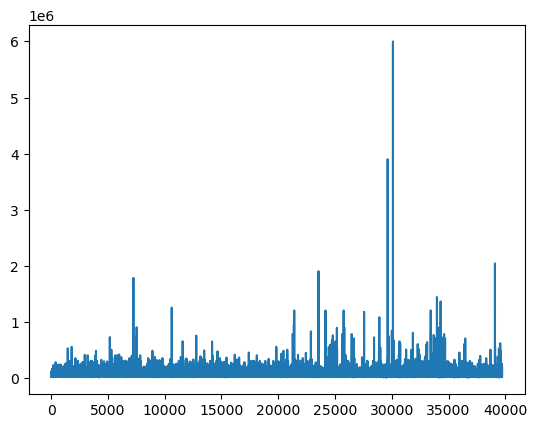

In [93]:
df['annual_inc'].plot()

<Axes: >

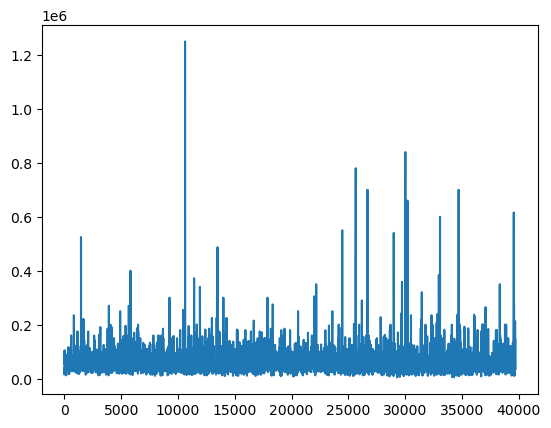

In [94]:
df_charged_off['annual_inc'].plot()

In [96]:
df_charged_off['annual_inc'].corr(df_charged_off['loan_amnt'])

0.35235931007949983

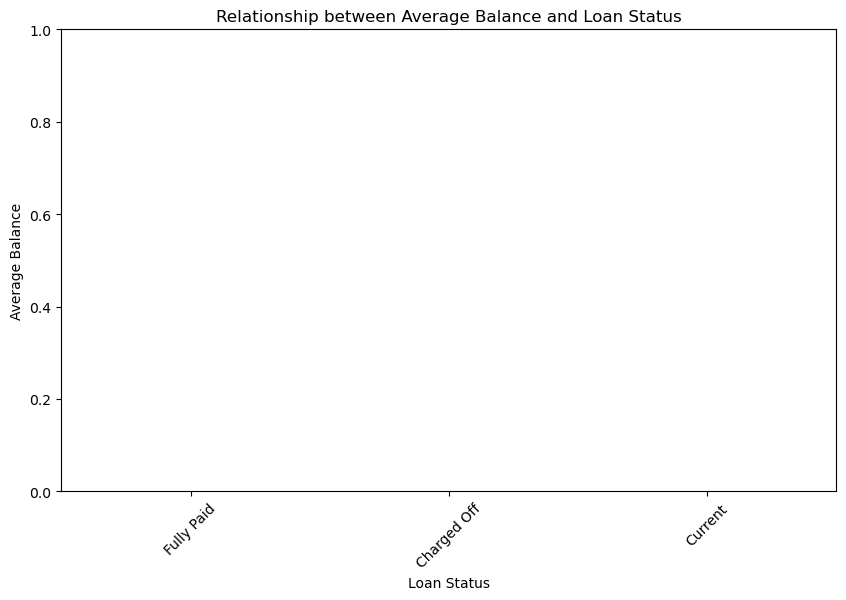

In [168]:
df_filtered = df[['avg_cur_bal', 'loan_status']]

# Create a box plot to visualize the relationship between annual income and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='avg_cur_bal', data=df_filtered)
plt.title('Relationship between Average Balance and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

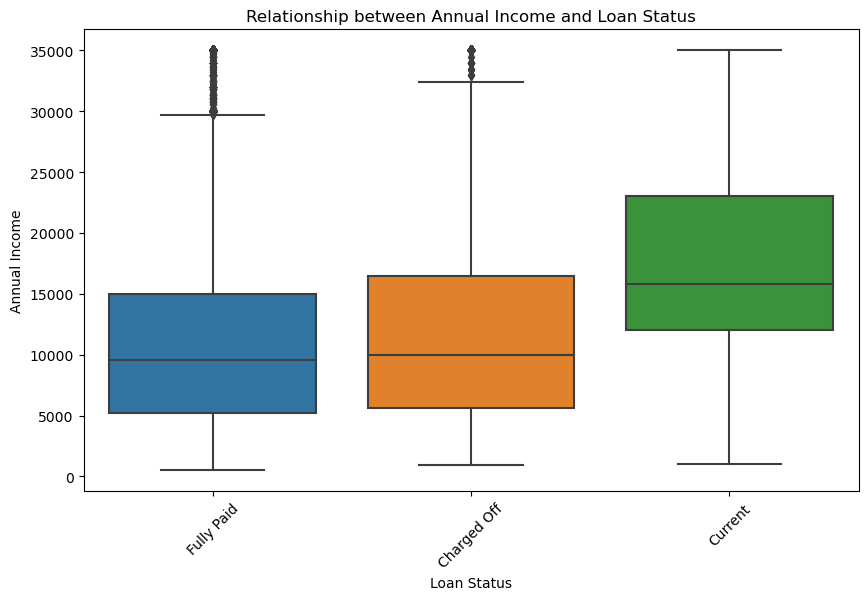

In [99]:
df_filtered = df[['loan_amnt', 'loan_status']]

# Create a box plot to visualize the relationship between annual income and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_filtered)
plt.title('Relationship between Annual Income and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

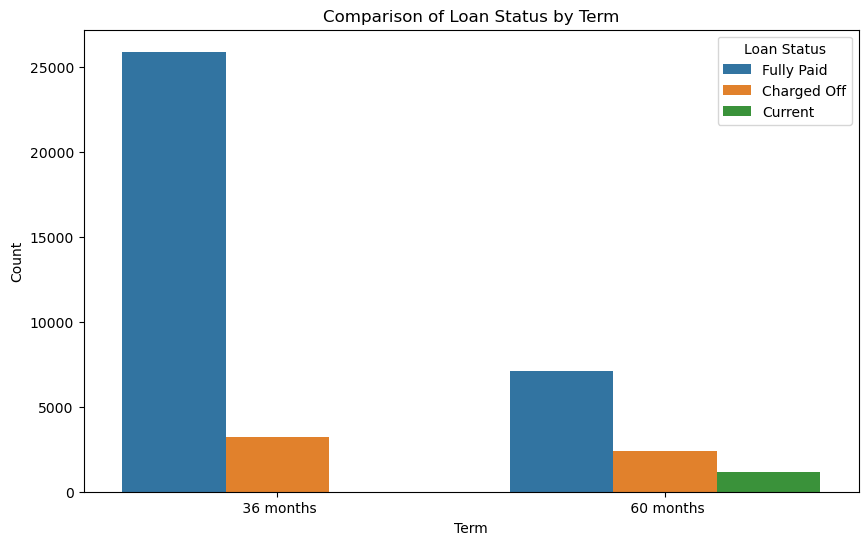

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=df)
plt.title('Comparison of Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

36 months have more chances to papy


### 14.  Now we will compare with term


# plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=df)
plt.title('Comparison of Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [192]:
plt.figure(figsize=(10, 6))
df3['loan_status'] = df['loan_status']
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Comparison of Loan Status by Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

NameError: name 'df3' is not defined

<Figure size 1000x600 with 0 Axes>

### 14.  Now we will do some quick analysis on multiple vars`


<Axes: >

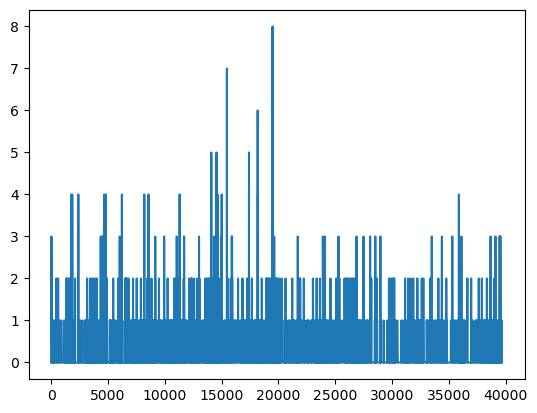

In [108]:
df_charged_off['delinq_2yrs'].plot()

In [110]:
df_charged_off['int_rate']

1        15.27%
8        21.28%
9        12.69%
12       13.49%
14       10.65%
          ...  
39667    12.80%
39668     9.64%
39669    15.01%
39678    10.59%
39688    13.43%
Name: int_rate, Length: 5627, dtype: object

In [128]:
df_charged_off['int_rate'].str[:-1].astype(float).mean()

13.820431846454595

In [127]:
df[(df['loan_status'] == 'Fully Paid')]['int_rate'].str[:-1].astype(float).mean()

11.60976115326252

In [130]:
df['dti']

0        27.65
1         1.00
2         8.72
3        20.00
4        17.94
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 39717, dtype: float64

<Axes: >

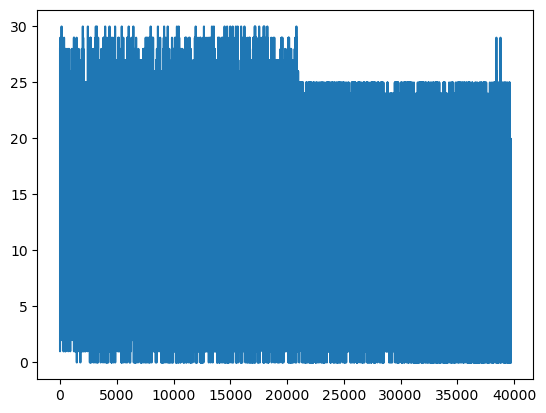

In [132]:
df['dti'].round().astype(int).plot()

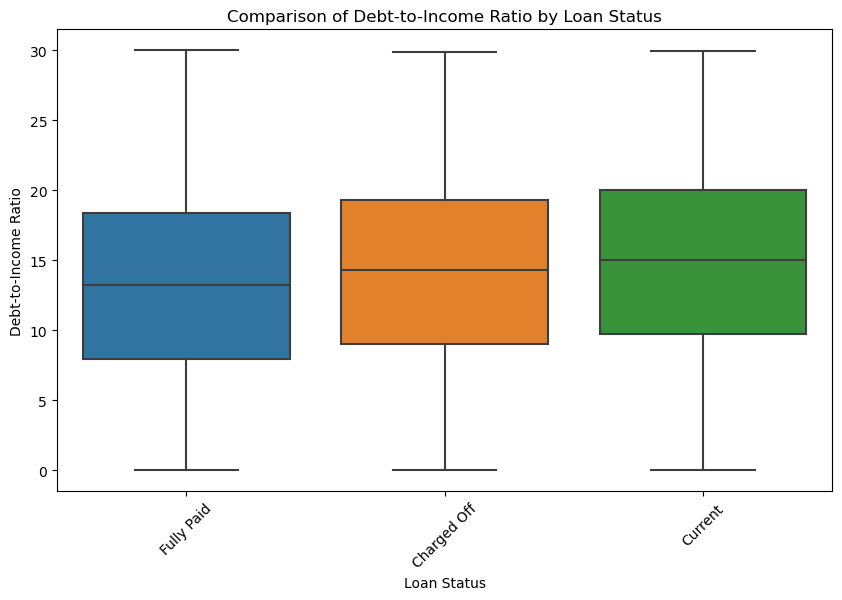

In [133]:
df_filtered = df[['dti', 'loan_status']]

# Create a box plot to visualize the relationship between dti and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df_filtered)
plt.title('Comparison of Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Here if you see we cannot decide what should be the threshold DIR, therefore we will not consider it much. For safe side we can keep it 25. That is DIR should not be more than 25



In [134]:
df['open_acc']

0         3
1         3
2         2
3        10
4        15
         ..
39712    13
39713     6
39714    11
39715    17
39716     7
Name: open_acc, Length: 39717, dtype: int64

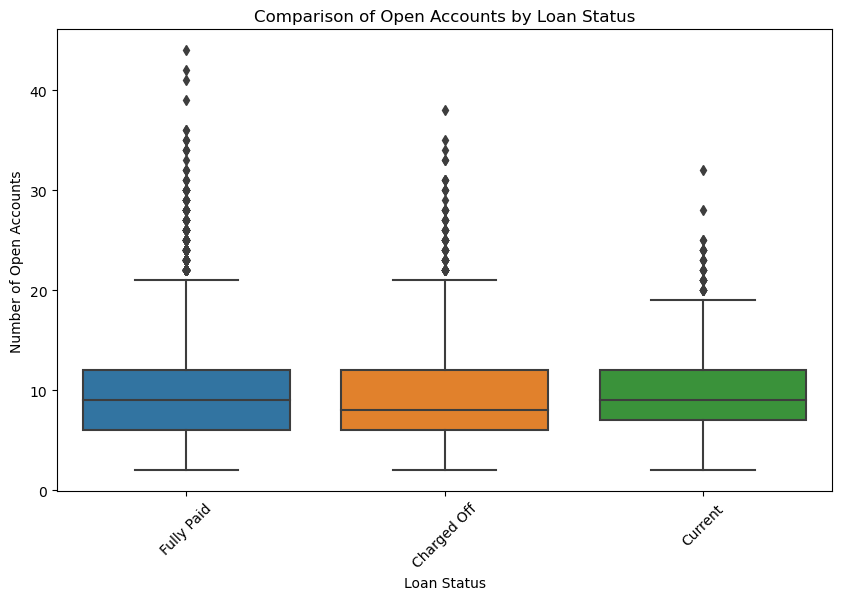

In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='open_acc', data=df)
plt.title('Comparison of Open Accounts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Open Accounts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [143]:
paid = df[(df['loan_status'] == 'Fully Paid')]
paid['pub_rec'].mean()

0.05040971168437026

In [144]:
paid = df[(df['loan_status'] == 'Charged Off')]
paid['pub_rec'].mean()

0.0847698596054736

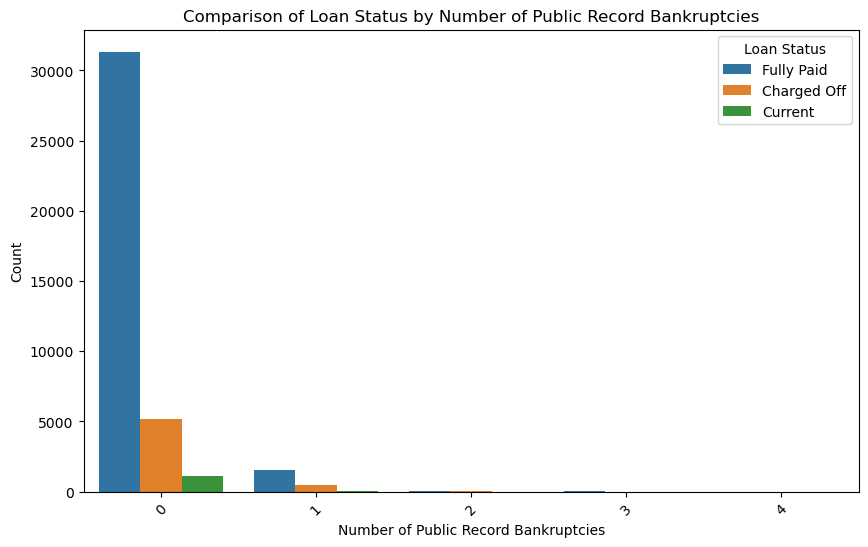

In [145]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec', hue='loan_status', data=df)
plt.title('Comparison of Loan Status by Number of Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status')
plt.show()


In [148]:
df['total_acc']

0         9
1         4
2        10
3        37
4        38
         ..
39712    40
39713     9
39714    20
39715    26
39716     8
Name: total_acc, Length: 39717, dtype: int64

In [150]:
df['total_acc'].mean()

22.08882846136415

In [153]:
df['delinq_2yrs']

0        0
1        0
2        0
3        0
4        0
        ..
39712    0
39713    1
39714    0
39715    0
39716    1
Name: delinq_2yrs, Length: 39717, dtype: int64

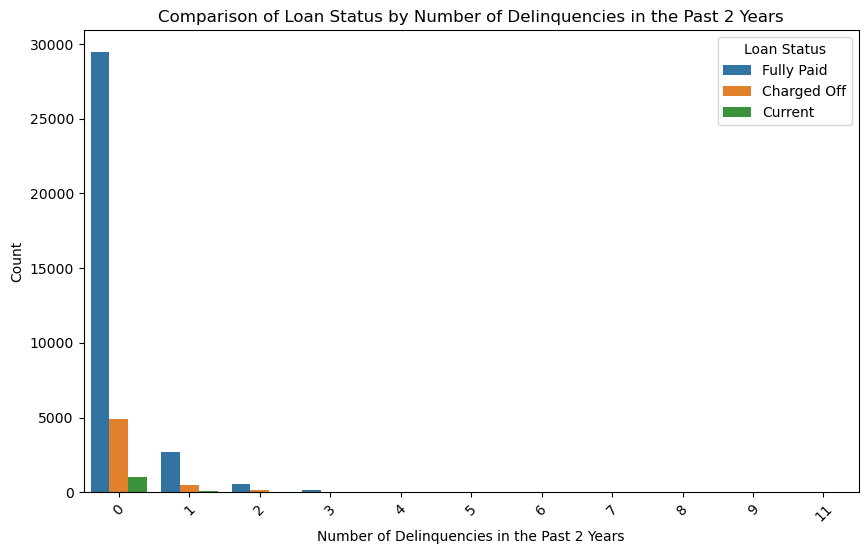

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(x='delinq_2yrs', hue='loan_status', data=df)
plt.title('Comparison of Loan Status by Number of Delinquencies in the Past 2 Years')
plt.xlabel('Number of Delinquencies in the Past 2 Years')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status')
plt.show()

0 is good, 1 id acceptable, 2 or more
is reject

In [155]:
df['addr_state']

0        AZ
1        GA
2        IL
3        CA
4        OR
         ..
39712    CO
39713    NC
39714    MA
39715    MD
39716    MA
Name: addr_state, Length: 39717, dtype: object

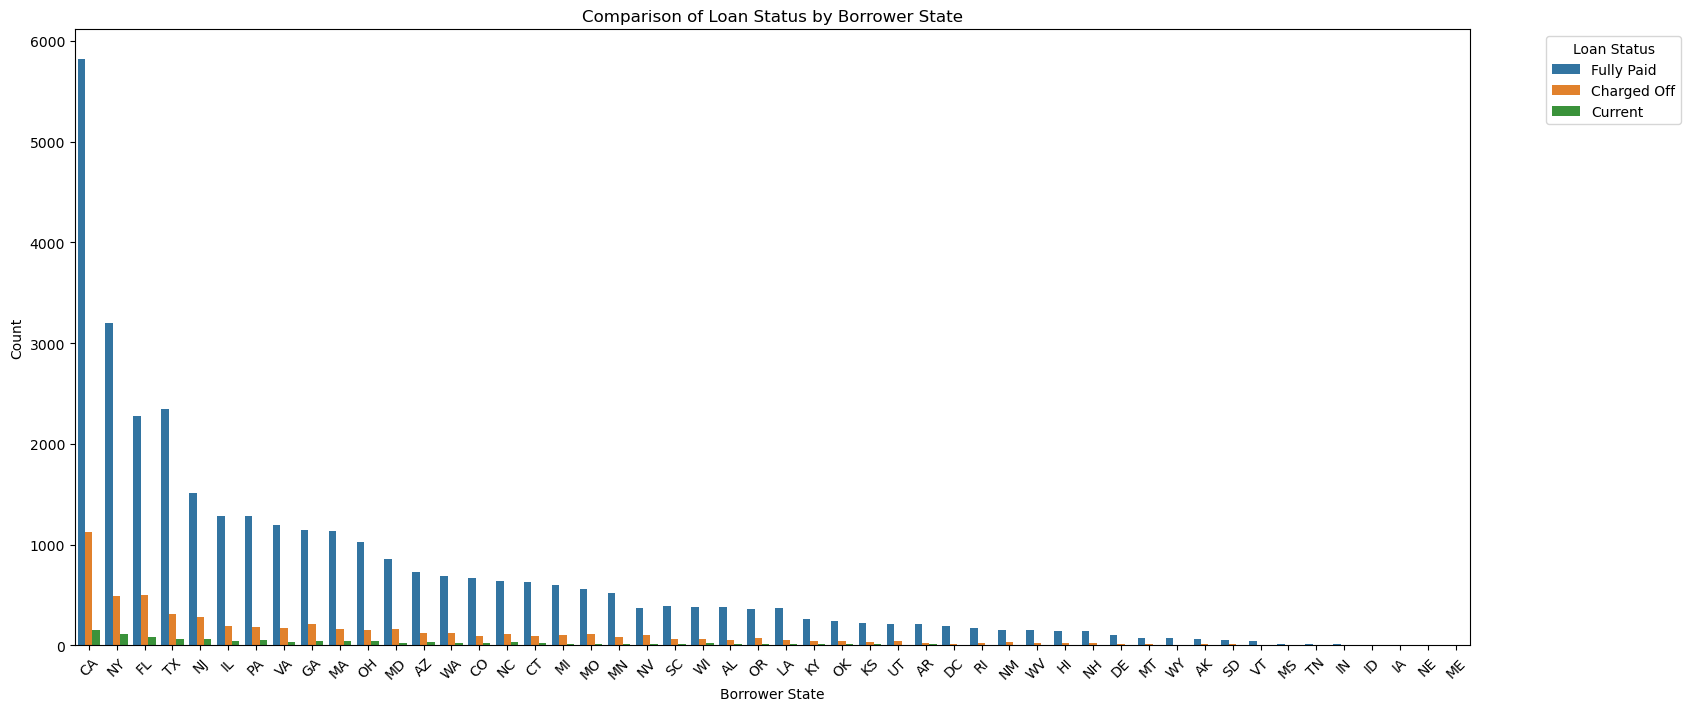

In [156]:
plt.figure(figsize=(18, 8))
sns.countplot(x='addr_state', hue='loan_status', data=df, order=df['addr_state'].value_counts().index)
plt.title('Comparison of Loan Status by Borrower State')
plt.xlabel('Borrower State')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [158]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

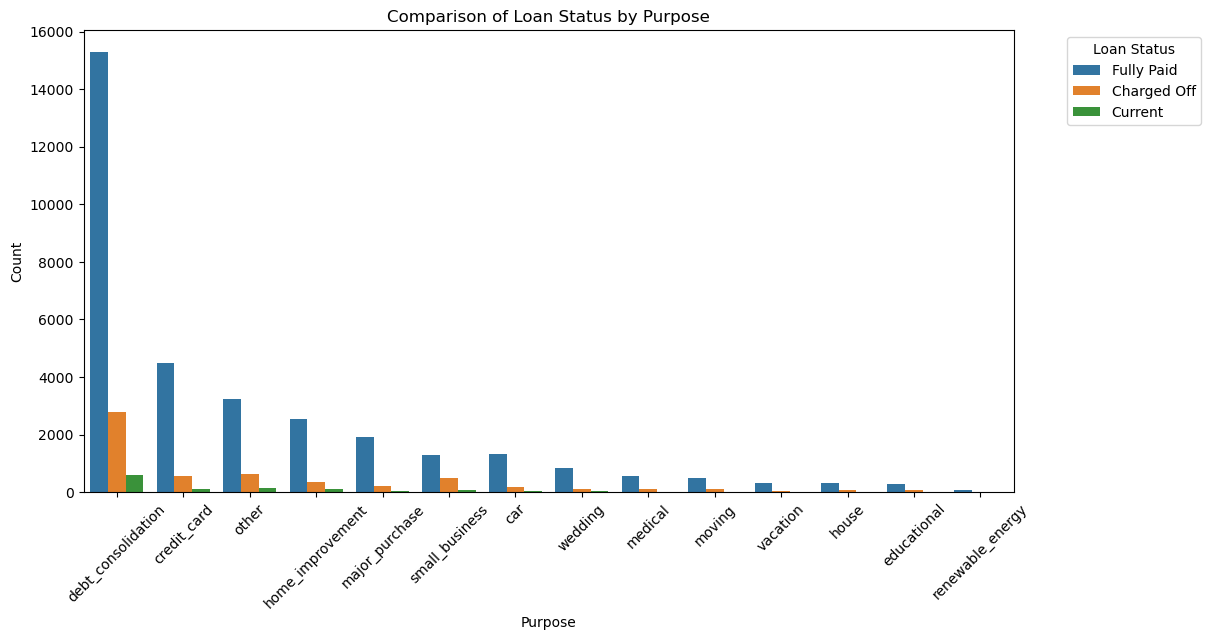

In [159]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='loan_status', data=df, order=df['purpose'].value_counts().index)
plt.title('Comparison of Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
